In [1]:
import json
from PIL import Image
from collections import defaultdict
import random
from utils import *

In [3]:
with open('results.json', 'r') as f:
    gpt_responses = json.load(f)

In [ ]:
interpretable_results = defaultdict(list)

for image_path, responses in gpt_responses.items():
    for response in responses:
        if response['gpt_response']['interpretable']:
            interpretable_results[image_path].append(response)
            
# Sample 5 for each image
interpretable_results = {k: random.sample(v, min(5, len(v))) for k, v in interpretable_results.items()}

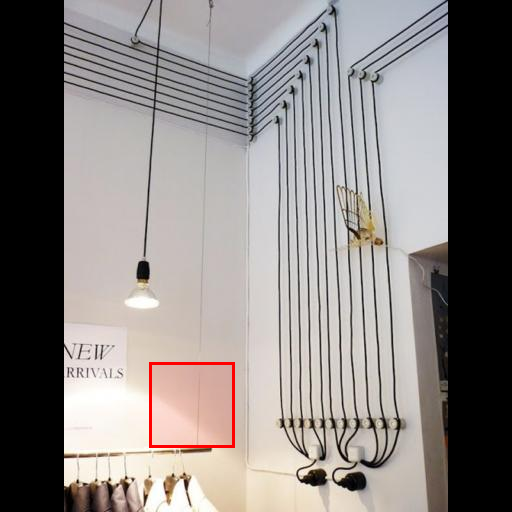

['Going', ' displayed', ' cellar', ' decor', ' venue']
{
    "interpretable": true,
    "words": [
        " decor"
    ],
    "reasoning": "The boxed area shows part of an interior wall with hanging elements in a shop, relating to interior decor. The other words (Going, displayed, cellar, venue) do not specifically connect to the contents of the region."
}


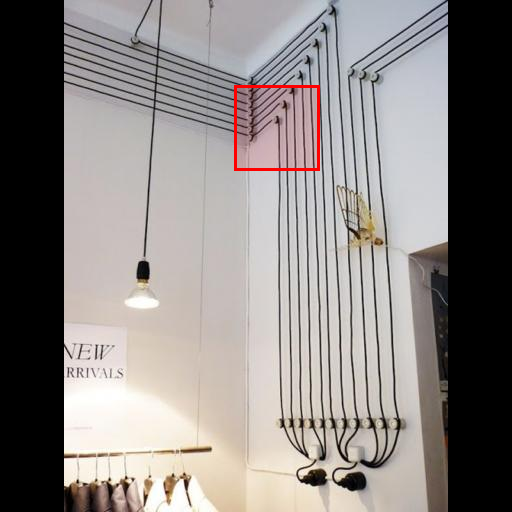

['/util', ' chord', "';\n", 'ке', ' %}\n']
{
    "interpretable": true,
    "words": [
        " chord"
    ],
    "reasoning": "The boxed area shows multiple thin lines/cords converging near the ceiling. The word 'chord' is plausibly related through its visual similarity/homophone to cords/strings. The other items are code fragments or unrelated text."
}


In [ ]:
for image_path, responses in interpretable_results.items():
    for response in responses:
        # Process the image
        processed_image, _ = process_image_with_mask(response['original_image_path'])
        bbox = calculate_square_bbox_from_patch(response['patch_row'], response['patch_col'], 21.33, 3)
        image = draw_bbox_on_image(processed_image, bbox)
        image.show()
        print([x['token'] for x in response['high_confidence_tokens']])
        print(json.dumps(response['gpt_response'], indent=4))